<a href="https://colab.research.google.com/github/audrb1999/ML-DL-Study/blob/main/%EC%8B%AC%EC%B8%B5%20%EC%8B%A0%EA%B2%BD%EB%A7%9D%20%EC%84%B1%EB%8A%A5%20%ED%96%A5%EC%83%81%EC%8B%9C%ED%82%A4%EA%B8%B0/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D%20%EC%96%B4%ED%94%8C%EB%A6%AC%EC%BC%80%EC%9D%B4%EC%85%98%20%EC%84%A4%EC%A0%95%ED%95%98%EA%B8%B0/29_%ED%85%8C%EC%8A%A4%ED%8A%B8%EC%8B%9C%EC%9D%98_%EB%B0%B0%EC%B9%98_%EC%A0%95%EA%B7%9C%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 테스트시의 배치 정규화

배치 정규화는 한 번에 하나의 미니배치 데이터를 처리합니다.

하지만 테스트에서는 한번에 한 샘플씩 처리해야 합니다.

1. Single mini batch에서 평균을 구하기 위하여 $z^{(i)}$값을 합함

- $\mu = \frac 1 m \Sigma z^{(i)}$ 미니 배치안의 샘플들을 모두 합한 것

> 여기서 m은 미니 배치 안의 샘플 수!

2. 분산을 계산하기 

- $\sigma^2 = \frac 1 m \Sigma (z^{(i)} - \mu)^2$

3. 평균과 표준편차로 크기를 조정해서 $z_{norm}$도 계산할 수 있다

- $$z^{(i)}_{norm} =  \frac {z^{(i) - \mu}} {\sqrt{\sigma^2 + \epsilon}}$$ 

- 앱실론은 수학적 안정성을 위해 추가되었습니다.

4. z틸다 

- $z$~ = $\gamma z^{(i)}_{norm} + \beta$

> 표준편차는 분사에 루트를 씌운 것, 평균으로 부터 원해 데이터에 대한 오차범위의 근사값이다.


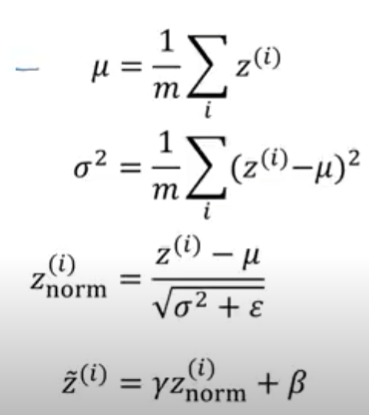

$\mu, \sigma^2$은 학습때는 미니배치 안에서 계산이 되지만 테스트에서는 미니배치가 없기 때문에 동시에 처리할 수 없습니다.

하나의 샘플만 있을 때 그 샘플의 평균과 분산을 구하는 건 말이 안됨!

각각 독립된 $\mu$와 $\sigma^2$의 추정치를 사용하면 됩니다.

전형적인 배치 정규화를 구현할 떄는 여러 미니 배치에 걸쳐서 구한 지수가중평균을 추정치로 사용합니다.

한 층을 고르고 거기서 학습할 때 평균으로 사용된 여러 미니배치 $\mu$들을 지수가중평균을 냅니다. 분산도 마찬가지로 계산해서 테스트떄 사용하면됩니다.




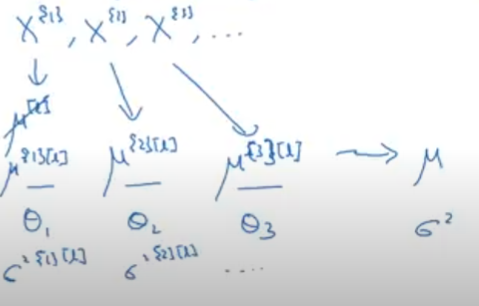

어떤 층의 미니배치 X1, X2, X3들의 학습 때 쓰인 분산, 평균을 구해서 지수가중평균을 내서 테스트 때 사용한다!

테스트때는 단순히 $z^{(i)}_{norm} $만 계산하면 됩니다.

z틸다에 대해서도 계산할 수 있습니다.

이 방법은 안정적인 방법! 테스트 때 하나의 값에대한 걸 구할 수 없으니 학습 데이터에서 추정하는 것!